# Object Detection

In [2]:
import ObjectDetection as od
import importlib
importlib.reload(od)
import inspect
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.svm import LinearSVC

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import cv2

%matplotlib inline

plt_img_width = 10
plt_img_height = 8


## Draw Bounding Boxes

def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # make a copy of the image
    draw_img = np.copy(img)

    for box in bboxes:
        cv2.rectangle(draw_img, box[1], box[0], color, thick)

    return draw_img



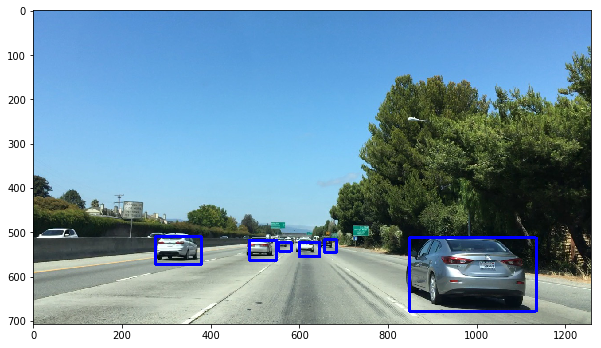

In [2]:

image = mpimg.imread('test_images/bbox-example-image.jpg')

# Add bounding boxes in this format, these are just example coordinates.
bboxes = [((275, 572), (380, 510)), ((488, 563), (549, 518)), ((554, 543), (582, 522)), 
          ((601, 555), (646, 522)), ((657, 545), (685, 517)), ((849, 678), (1135, 512))]

result = od.draw_boxes(image, bboxes)
draw_boxes_src = inspect.getsource(od.draw_boxes)
print(draw_boxes_src)
plt.figure(figsize=(plt_img_width,plt_img_height))
plt.imshow(result)

## Color Space

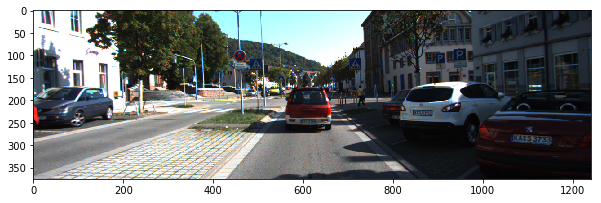

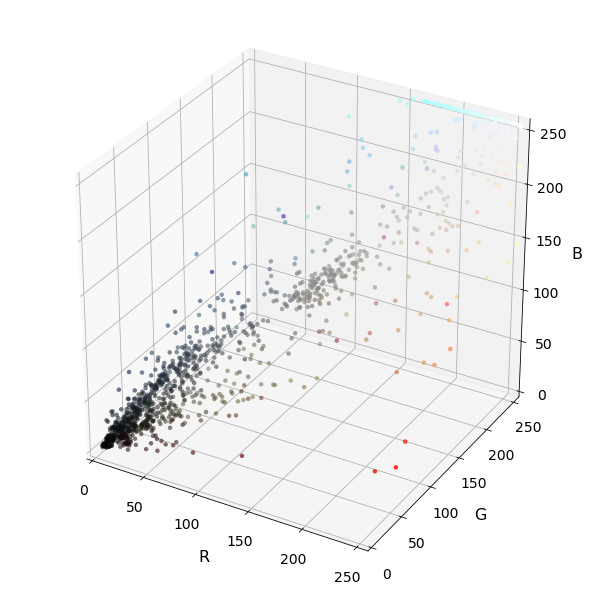

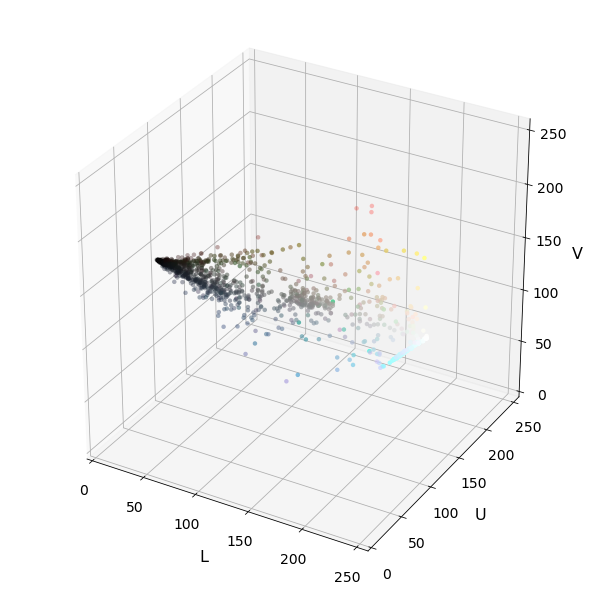

In [4]:
import ObjectDetection as od
import importlib
importlib.reload(od)

# Read a color image
img = cv2.imread("test_images/000275.png")

# Select a small fraction of pixels to plot by subsampling it
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)
img_big_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2LUV)
img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

# Plot and show
plt.figure(figsize=(plt_img_width,plt_img_height))
plt.imshow(img_big_RGB)

od.plot3d(img_small_RGB, img_small_rgb)
plt.show()

od.plot3d(img_small_HSV, img_small_rgb, axis_labels=list("LUV"))
plt.show()

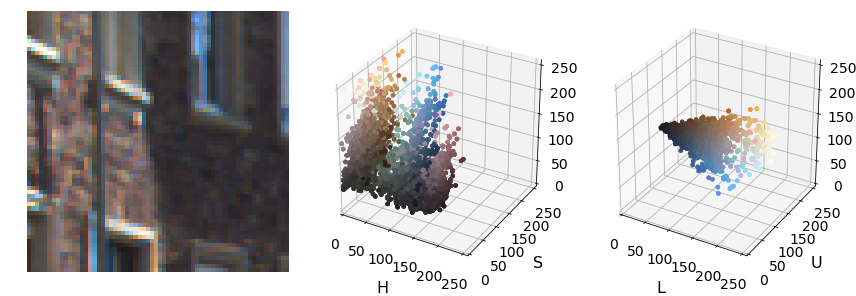

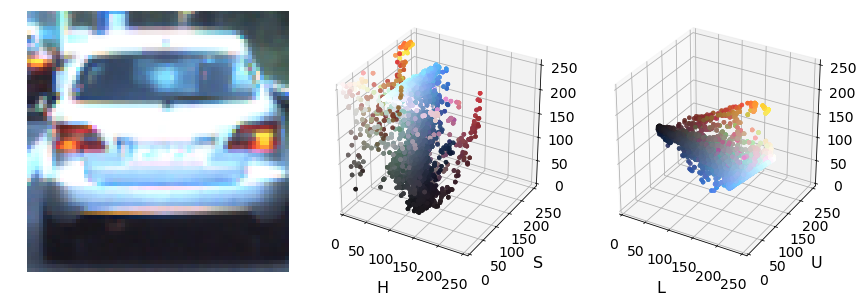

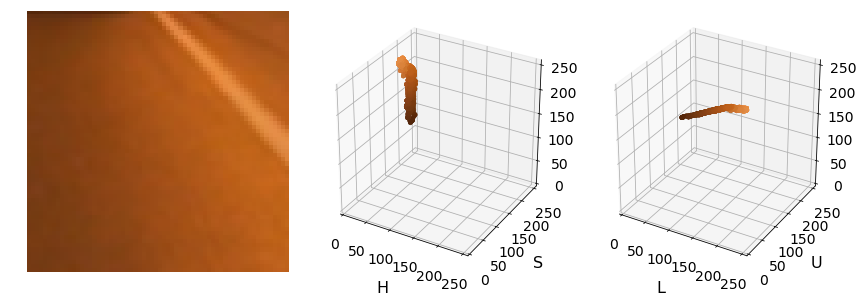

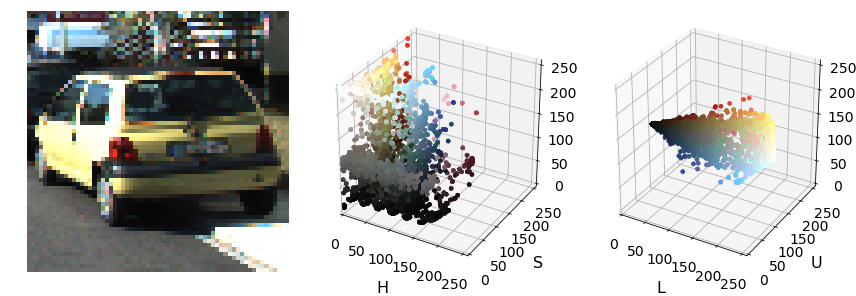

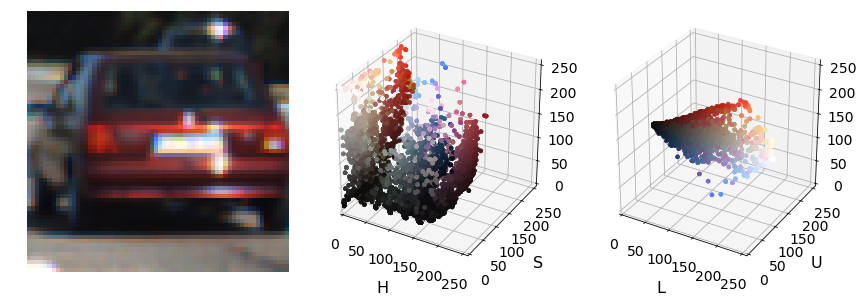

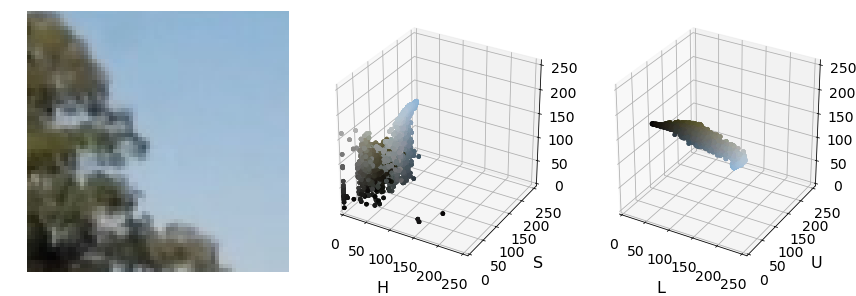

In [5]:

import  glob

  # Test images from project video# Test  
test_images_file_filter = 'test_images/small_sub_set_car_non_car/*.png'
test_images_file_file_names = glob.glob(test_images_file_filter)

for index, test_images_file_file_name in zip(range(len(test_images_file_file_names)), test_images_file_file_names):
    image = cv2.imread(test_images_file_file_name)
    
    fig = plt.figure(figsize=(12,12))
    
    # Select a small fraction of pixels to plot by subsampling it
    scale = max(image.shape[0], image.shape[1], 64) / 64  # at most 64 rows and columns
    img_small = cv2.resize(image, (np.int(image.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)
    
    img_big_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
    img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
    img_small_LUV = cv2.cvtColor(img_small, cv2.COLOR_BGR2LUV)
    img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting
    
    #od.plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
    
    ax = fig.add_subplot(131)
    ax.imshow(img_big_RGB)
    ax.set_axis_off()

    ax = fig.add_subplot(132, projection='3d')
    od.plot3dOnFigure(ax, img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
    ax.set_aspect('equal')
    
    ax = fig.add_subplot(133, projection='3d')
    od.plot3dOnFigure(ax, img_small_LUV, img_small_rgb, axis_labels=list("LUV"))
    ax.set_aspect('equal')
    plt.tight_layout()
    
    


## Color Histogram

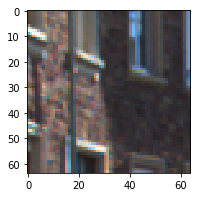

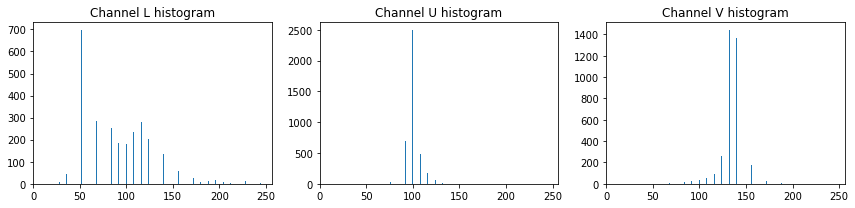

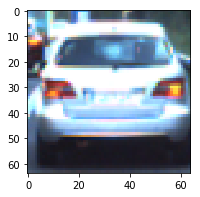

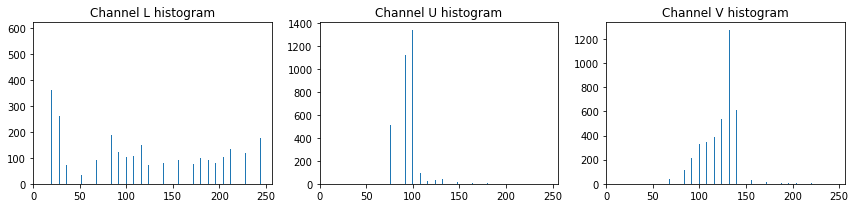

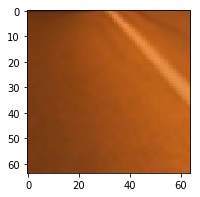

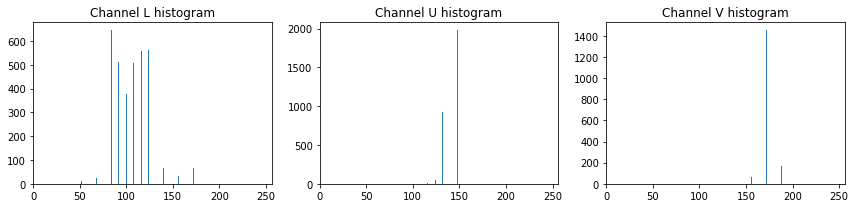

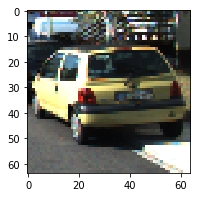

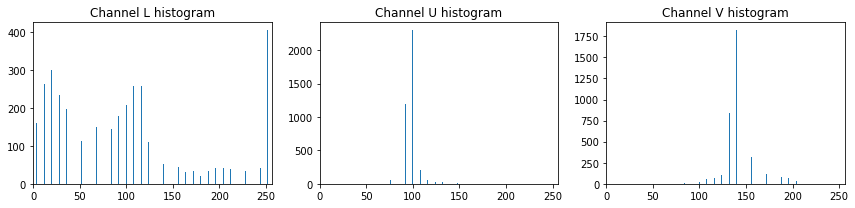

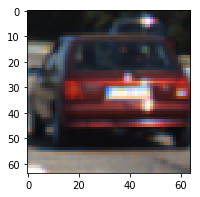

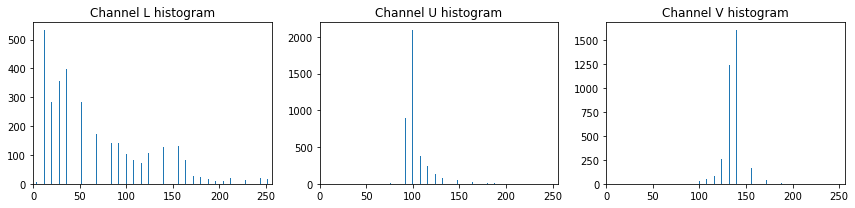

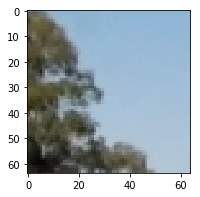

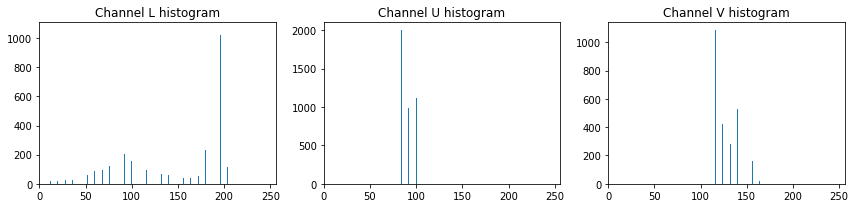

In [37]:
import ObjectDetection as od
importlib.reload(od)

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import  glob

  # Test images from project video# Test  
test_images_file_filter = 'test_images/small_sub_set_car_non_car/*.png'
test_images_file_file_names = glob.glob(test_images_file_filter)

for index, test_images_file_file_name in zip(range(len(test_images_file_file_names)), test_images_file_file_names):
    image = cv2.imread(test_images_file_file_name)
    
    fig = plt.figure(figsize=(12,12))
    
    # Select a small fraction of pixels to plot by subsampling it
    scale = max(image.shape[0], image.shape[1], 64) / 64  # at most 64 rows and columns
    img_small = cv2.resize(image, (np.int(image.shape[1] / scale), np.int(image.shape[0] / scale)), 
                           interpolation=cv2.INTER_NEAREST)
    
    img_big_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
    img_small_LUV = cv2.cvtColor(img_small, cv2.COLOR_BGR2LUV)
    img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting
    
    #od.plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
    
    channel1_hist, channel2_hist, channel3_hist, bin_centers, hist_features = od.color_hist(img_small_LUV)
    
    
    fig = plt.figure(figsize=(12,3))
    plt.imshow(img_big_RGB)
    
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bin_centers, channel1_hist[0])
    plt.xlim(0, 256)
    plt.title('Channel L histogram')
    plt.subplot(132)
    plt.bar(bin_centers, channel2_hist[0])
    plt.xlim(0, 256)
    plt.title('Channel U histogram')
    plt.subplot(133)
    plt.bar(bin_centers, channel3_hist[0])
    plt.xlim(0, 256)
    plt.title('Channel V histogram')
    plt.tight_layout()
    
    


## Spatial Binning of Color

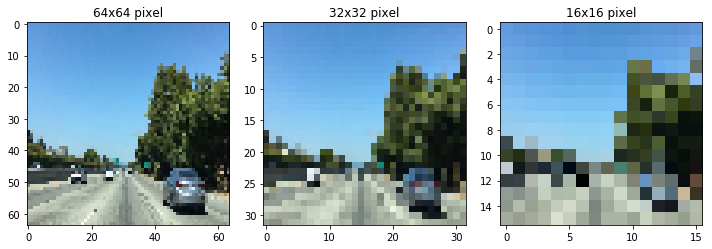

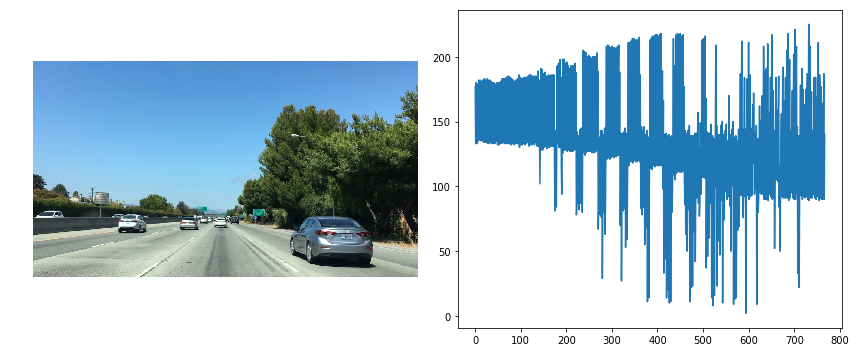

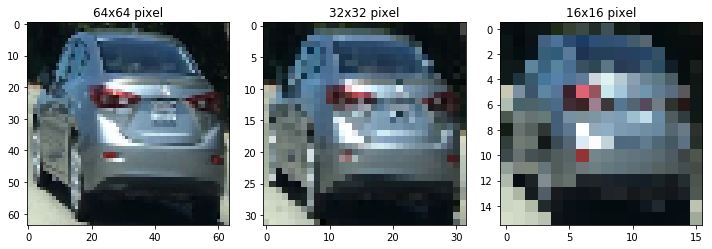

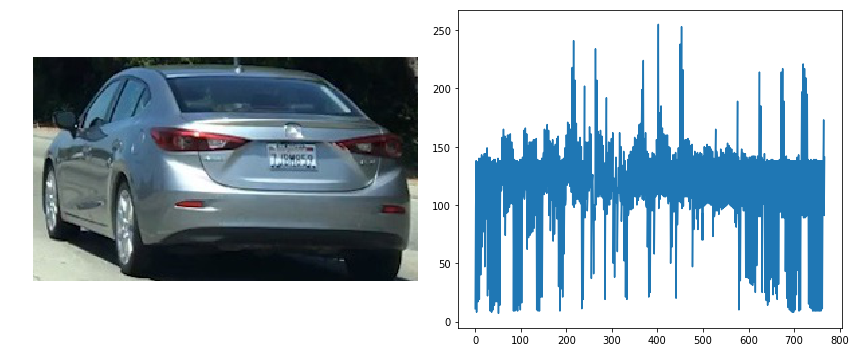

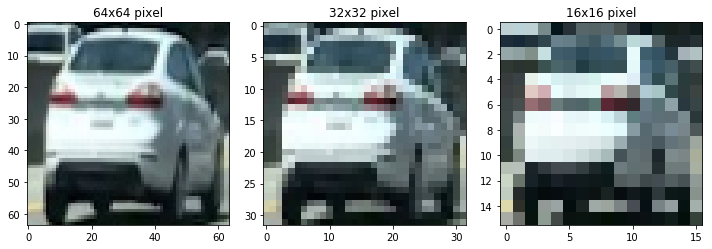

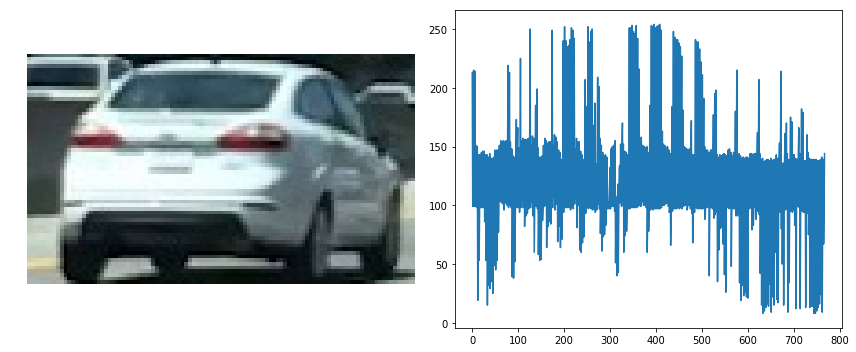

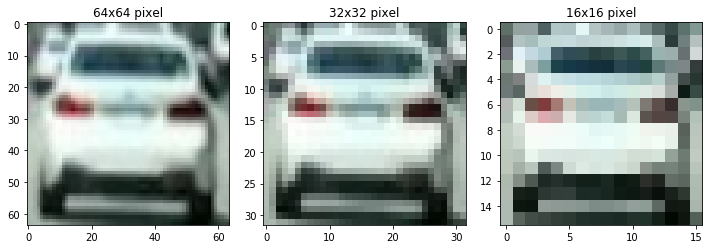

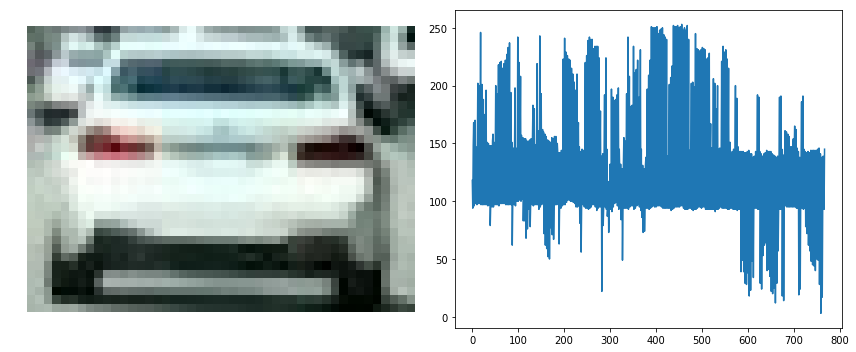

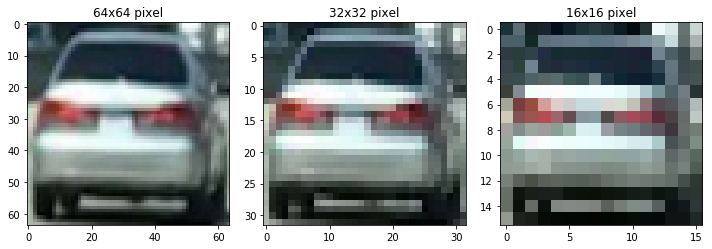

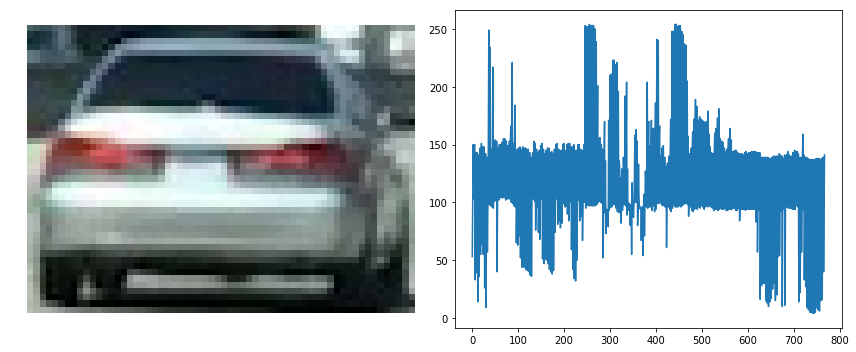

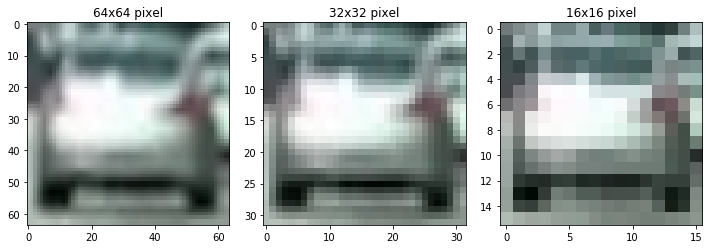

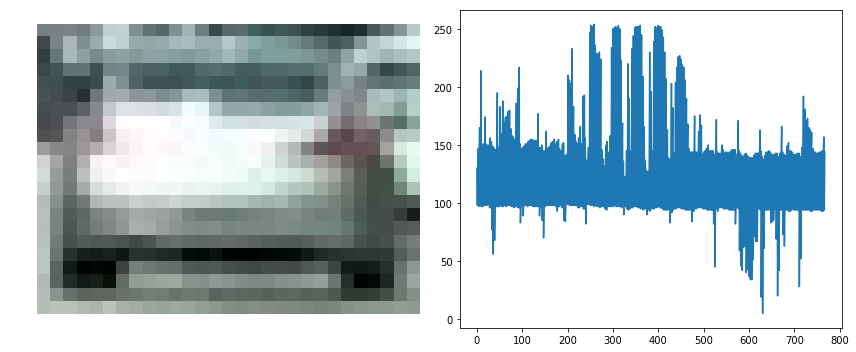

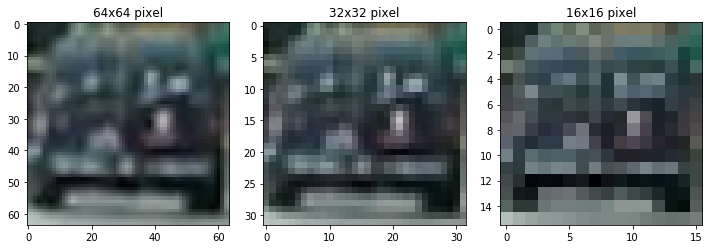

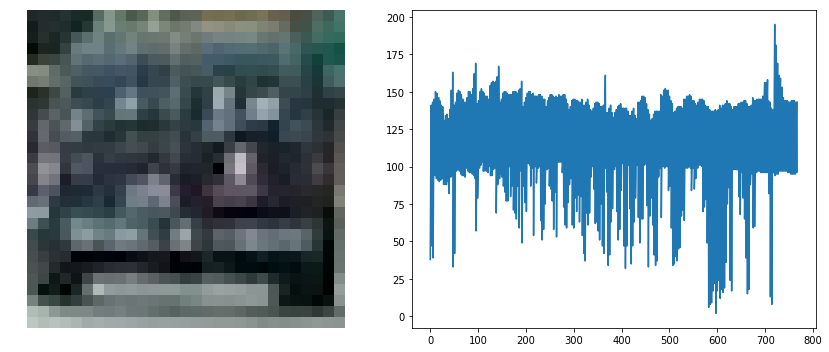

In [15]:
import  glob

  # Test images from project video# Test  
test_images_file_filter = 'test_images/cutouts/*.jpg'
test_images_file_file_names = glob.glob(test_images_file_filter)

for index, test_images_file_file_name in zip(range(len(test_images_file_file_names)), test_images_file_file_names):
    image = cv2.imread(test_images_file_file_name)
    img_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    fig = plt.figure(figsize=(plt_img_width, plt_img_height))
    plt.subplot(131)
    plt.imshow(cv2.resize(img_RGB, (64,64)))
    plt.title('64x64 pixel')
    plt.subplot(132)
    plt.imshow(cv2.resize(img_RGB, (32,32)))
    plt.title('32x32 pixel')
    plt.subplot(133)
    plt.imshow(cv2.resize(img_RGB, (16,16)))
    plt.title('16x16 pixel')
    plt.tight_layout()  

    fig = plt.figure(figsize=(12,5))
    
    feature_vec = od.bin_spatial(image, color_space='LUV', size=(16, 16))
    
    ax = fig.add_subplot(121)
    ax.imshow(img_RGB)
    ax.set_axis_off()

    ax = fig.add_subplot(122)
    ax.plot(feature_vec)
    plt.tight_layout()
   
    





## HOG image

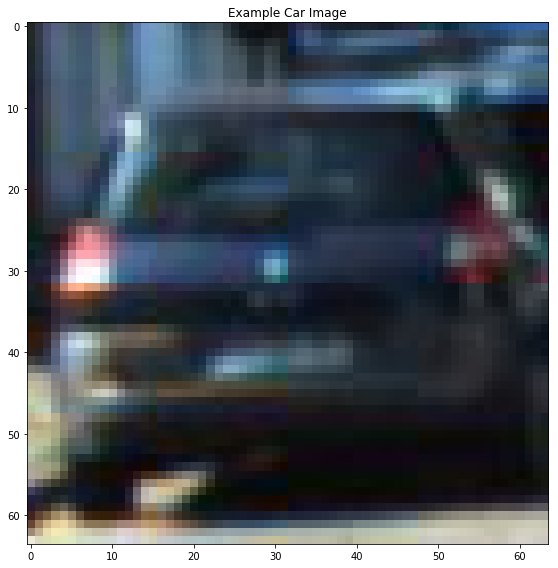

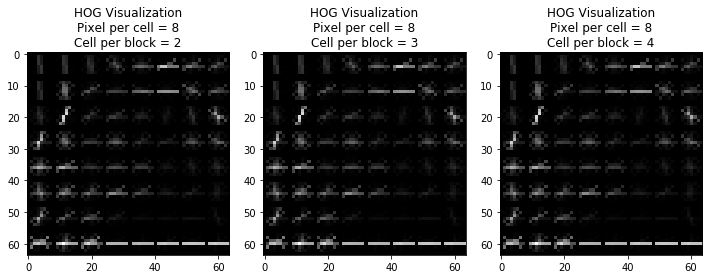

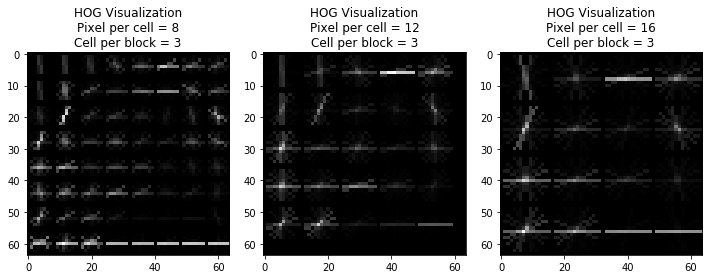

In [25]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from skimage.feature import hog

# Read in our vehicles
car_images = glob.glob('test_images/medium_set_car_non_car/vehicles_smallset/cars1/*.jpeg')

# Generate a random index to look at a car image
ind = np.random.randint(0, len(car_images))
# Read in the image
image = mpimg.imread(car_images[ind])
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
orient = 9
pix_per_cell = 8

# Call our function with vis=True to see an image output
features_1, hog_image_1 = od.get_hog_features(gray, orient= orient, 
                        pix_per_cell= pix_per_cell, cell_per_block=2, 
                        vis=True, feature_vec=False)

features_2, hog_image_2 = od.get_hog_features(gray, orient= orient, 
                        pix_per_cell= pix_per_cell, cell_per_block=3, 
                        vis=True, feature_vec=False)

features_3, hog_image_3 = od.get_hog_features(gray, orient= orient, 
                        pix_per_cell= pix_per_cell, cell_per_block=4, 
                        vis=True, feature_vec=False)

# Plot the examples
fig = plt.figure(figsize=(plt_img_width, plt_img_height))
plt.imshow(image, cmap='gray')
plt.title('Example Car Image')
plt.tight_layout()
fig = plt.figure(figsize=(plt_img_width, plt_img_height))
plt.subplot(131)
plt.imshow(hog_image_1, cmap='gray')
plt.title('HOG Visualization\nPixel per cell = 8\nCell per block = 2')
plt.subplot(132)
plt.imshow(hog_image_2, cmap='gray')
plt.title('HOG Visualization\nPixel per cell = 8\nCell per block = 3')
plt.subplot(133)
plt.imshow(hog_image_3, cmap='gray')
plt.title('HOG Visualization\nPixel per cell = 8\nCell per block = 4')
plt.tight_layout()    


# Call our function with vis=True to see an image output
features_1, hog_image_1 = od.get_hog_features(gray, orient= orient, 
                        pix_per_cell= 8, cell_per_block=3, 
                        vis=True, feature_vec=False)

features_2, hog_image_2 = od.get_hog_features(gray, orient= orient, 
                        pix_per_cell= 12, cell_per_block=3, 
                        vis=True, feature_vec=False)

features_3, hog_image_3 = od.get_hog_features(gray, orient= orient, 
                        pix_per_cell= 16, cell_per_block=3, 
                        vis=True, feature_vec=False)

fig = plt.figure(figsize=(plt_img_width, plt_img_height))
plt.subplot(131)
plt.imshow(hog_image_1, cmap='gray')
plt.title('HOG Visualization\nPixel per cell = 8\nCell per block = 3')
plt.subplot(132)
plt.imshow(hog_image_2, cmap='gray')
plt.title('HOG Visualization\nPixel per cell = 12\nCell per block = 3')
plt.subplot(133)
plt.imshow(hog_image_3, cmap='gray')
plt.title('HOG Visualization\nPixel per cell = 16\nCell per block = 3')
plt.tight_layout()    


## Not Car HOG

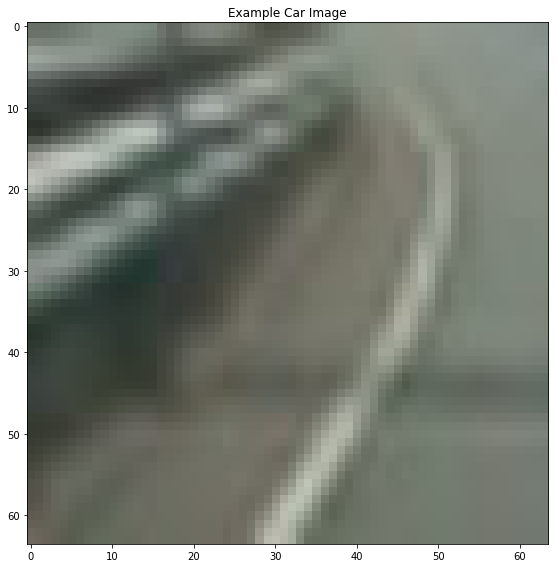

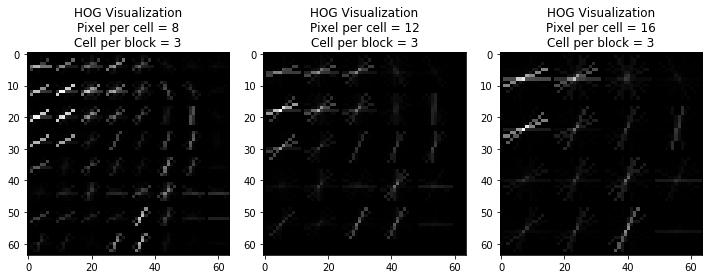

In [8]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from skimage.feature import hog

# Read in our vehicles
car_images = glob.glob('test_images/medium_set_car_non_car/non-vehicles_smallset/notcars1/*.jpeg')

# Generate a random index to look at a car image
ind = np.random.randint(0, len(car_images))
# Read in the image
image = mpimg.imread(car_images[ind])
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Call our function with vis=True to see an image output
features_1, hog_image_1 = od.get_hog_features(gray, orient= orient, 
                        pix_per_cell= 8, cell_per_block=3, 
                        vis=True, feature_vec=False)

features_2, hog_image_2 = od.get_hog_features(gray, orient= orient, 
                        pix_per_cell= 12, cell_per_block=3, 
                        vis=True, feature_vec=False)

features_3, hog_image_3 = od.get_hog_features(gray, orient= orient, 
                        pix_per_cell= 16, cell_per_block=3, 
                        vis=True, feature_vec=False)

fig = plt.figure(figsize=(plt_img_width, plt_img_height))
plt.imshow(image, cmap='gray')
plt.title('Example Car Image')
plt.tight_layout()

fig = plt.figure(figsize=(plt_img_width, plt_img_height))
plt.subplot(131)
plt.imshow(hog_image_1, cmap='gray')
plt.title('HOG Visualization\nPixel per cell = 8\nCell per block = 3')
plt.subplot(132)
plt.imshow(hog_image_2, cmap='gray')
plt.title('HOG Visualization\nPixel per cell = 12\nCell per block = 3')
plt.subplot(133)
plt.imshow(hog_image_3, cmap='gray')
plt.title('HOG Visualization\nPixel per cell = 16\nCell per block = 3')
plt.tight_layout()    


## HOG Histogram

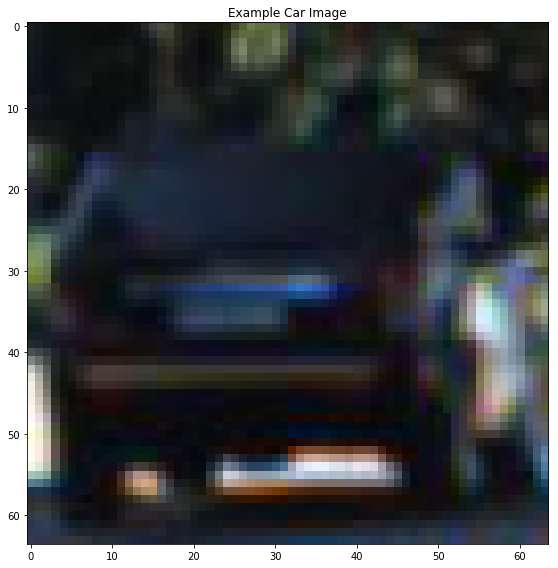

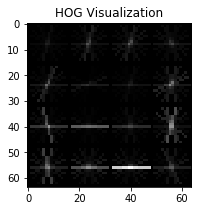

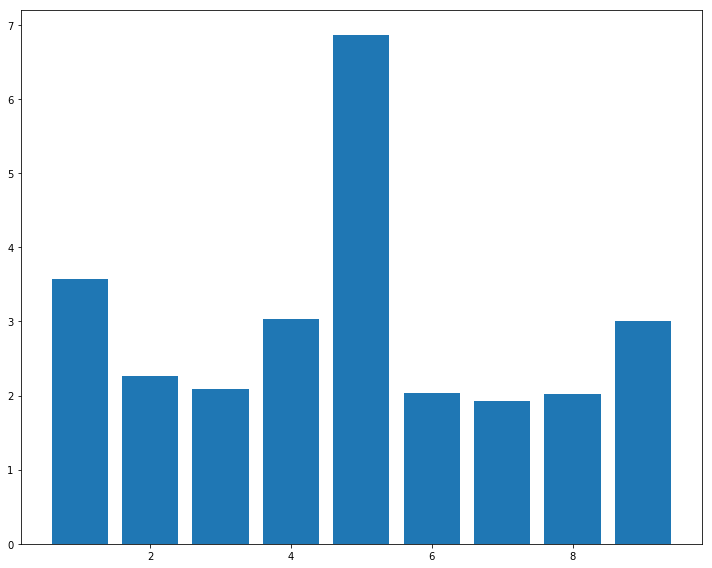

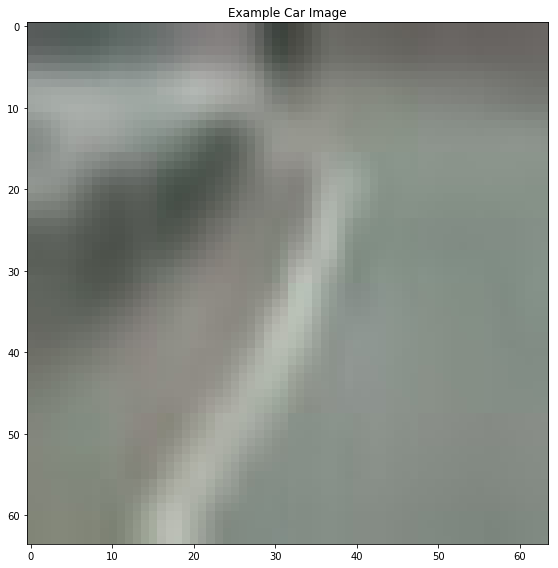

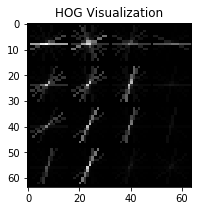

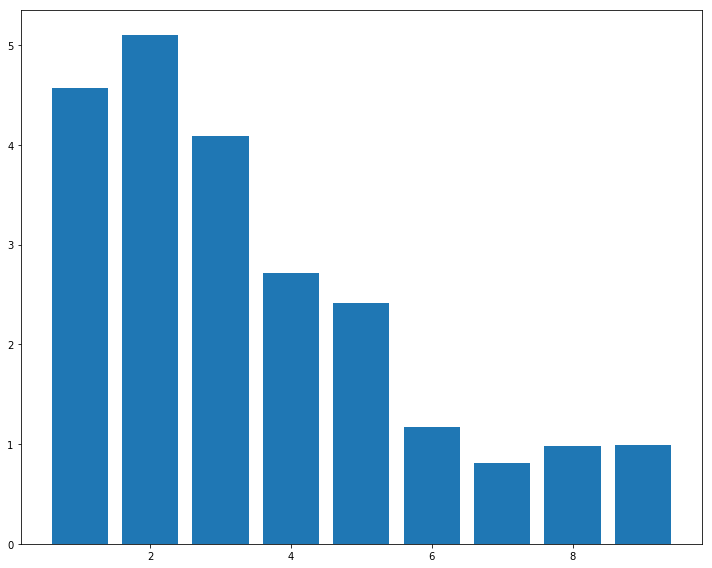

In [86]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from skimage.feature import hog

orient = 9
pix_per_cell = 16
cell_per_block = 3
x = np.linspace(1,orient, orient)

# Read in our vehicles
car_images = glob.glob('test_images/medium_set_car_non_car/vehicles_smallset/cars1/*.jpeg')

# Generate a random index to look at a car image
ind = np.random.randint(0, len(car_images))
# Read in the image
image = mpimg.imread(car_images[ind])
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Call our function with vis=True to see an image output
features_1, hog_image_1 = od.get_hog_features(gray, orient= orient, 
                        pix_per_cell= pix_per_cell, cell_per_block=cell_per_block, 
                        vis=True, feature_vec=False)

fig = plt.figure(figsize=(plt_img_width, plt_img_height))
plt.imshow(image, cmap='gray')
plt.title('Example Car Image')
plt.tight_layout()

fig = plt.figure(figsize=(plt_img_width, plt_img_height))
plt.subplot(131)
plt.imshow(hog_image_1, cmap='gray')
plt.title('HOG Visualization')

feature_vector = features_1.ravel()
feature_histogram = feature_vector.reshape(int(len(feature_vector) / orient),orient)
feature_histogram = np.sum(feature_histogram, axis=0)

fig = plt.figure(figsize=(plt_img_width, plt_img_height))
plt.bar(x,feature_histogram)
plt.tight_layout()   

# Read in our vehicles
car_images = glob.glob('test_images/medium_set_car_non_car/non-vehicles_smallset/notcars1/*.jpeg')

# Generate a random index to look at a car image
ind = np.random.randint(0, len(car_images))
# Read in the image
image = mpimg.imread(car_images[ind])
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Call our function with vis=True to see an image output
features_1, hog_image_1 = od.get_hog_features(gray, orient= orient, 
                        pix_per_cell= pix_per_cell, cell_per_block=cell_per_block, 
                        vis=True, feature_vec=False)

fig = plt.figure(figsize=(plt_img_width, plt_img_height))
plt.imshow(image, cmap='gray')
plt.title('Example Car Image')
plt.tight_layout()

fig = plt.figure(figsize=(plt_img_width, plt_img_height))
plt.subplot(131)
plt.imshow(hog_image_1, cmap='gray')
plt.title('HOG Visualization')


feature_vector = features_1.ravel()
feature_histogram = feature_vector.reshape(int(len(feature_vector) / orient),orient)
feature_histogram = np.sum(feature_histogram, axis=0)

fig = plt.figure(figsize=(plt_img_width, plt_img_height))
plt.bar(x,feature_histogram)
plt.tight_layout()   

## Concatenate Features

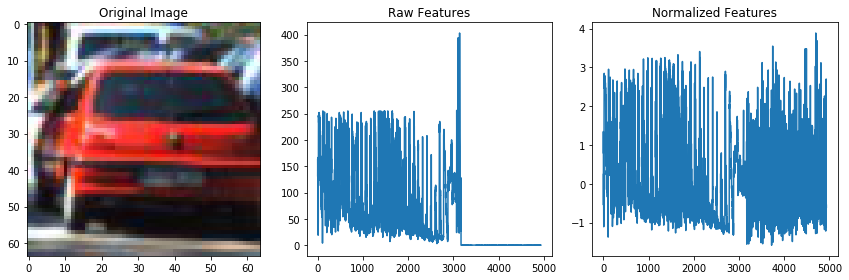

In [7]:
import ObjectDetection as od
importlib.reload(od)

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
import glob
import ntpath


images = glob.glob('test_images/medium_set_car_non_car/**/*.jpeg', recursive=True)

print()
cars = []
notcars = []
for image in images:
    image_basename =  ntpath.basename(image)
    if 'image' in image_basename or 'extra' in image_basename:
        notcars.append(image)
    else:
        cars.append(image)

car_features = od.extract_features(cars, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))

notcar_features = od.extract_features(notcars, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))


if len(car_features) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = np.random.randint(0, len(cars))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
else: 
    print('Your function only returns empty feature vectors...')

## Classification with left middle and right side car images

In [38]:
import ObjectDetection as od
importlib.reload(od)


from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

extract_spatial_features=False
extract_color_features = False
extract_hog_features = True
spatial = 32 
histogram_bins = 32

# hog parameters
orient=9
pix_per_cell=8
cell_per_block=3
hog_channel='ALL' # can take values of 0, 1, 2, or "ALL"

#images_path = 'test_images/medium_set_car_non_car/**/*.jpeg'
images_path = 'test_images/large_set_car_non_car/**/*.png'

# Set the parameters by cross-validation

'''
parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 1e-5], 'C': [1, 5, 10, 20]},
              {'kernel': ['linear'], 'C': [1, 5, 10, 20,100]}]
scores = ['precision', 'recall']

'''
#parameters = [{'kernel': ['linear'], 'C': [1,2,5,10]}]
parameters = [{'C': [0.001,0.01,0.1, 1,10]}]
scores = ['precision','recall']              

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    
    clf_left = GridSearchCV(LinearSVC(), parameters, cv=5,
                       scoring='%s_macro' % score, n_jobs=4)
    clf_middle = GridSearchCV(LinearSVC(), parameters, cv=5,
                       scoring='%s_macro' % score, n_jobs=4)
    
    clf_right = GridSearchCV(LinearSVC(), parameters, cv=5,
                       scoring='%s_macro' % score, n_jobs=4)
    
    
    svcs, X_scalers, X_tests, y_tests = od.train_svm(
        images_path, 'HSV', 
        extract_spatial_features, extract_color_features, extract_hog_features, 
        spatial, histogram_bins,
        orient, pix_per_cell, cell_per_block, hog_channel,
        [clf_left, clf_middle, clf_right])

    for i in range(len(svcs)):
        clf = svcs[i]
        print("---------------------------------------------")
        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()
    
        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        y_true, y_pred = y_tests[i], clf.predict(X_tests[i])
        print(classification_report(y_true, y_pred))
        print()
        
    print("====================================================")


# Tuning hyper-parameters for precision

Non Vehicles: 8968  Vehicles Left 1733  Middle: 3878  Right: 1950
Using spatial binning of: 32 and 32 histogram bins
Feature vector length: 8748
496.98 Seconds to train SVC...
Test Accuracy of SVC Left   =  0.9697
Test Accuracy of SVC Middle =  0.9944
Test Accuracy of SVC Right  =  0.9668
---------------------------------------------
Best parameters set found on development set:

{'C': 1}

Grid scores on development set:

0.943 (+/-0.012) for {'C': 1}
0.943 (+/-0.012) for {'C': 2}
0.943 (+/-0.012) for {'C': 5}
0.943 (+/-0.012) for {'C': 10}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

        0.0       1.00      0.99      0.99      1789
        1.0       0.94      0.98      0.96       352

avg / total       0.99      0.99      0.99      2141


---------------------------------------------
Best paramete

In [39]:
import ObjectDetection as od
importlib.reload(od)


from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

extract_spatial_features=True
extract_color_features = True
extract_hog_features = True
spatial = 16 
histogram_bins = 16
color_space = 'LUV'

# hog parameters
orient=9
pix_per_cell=16
cell_per_block=3
hog_channel='ALL' # can take values of 0, 1, 2, or "ALL"

#images_path = 'test_images/medium_set_car_non_car/**/*.jpeg'
images_path = 'test_images/large_set_car_non_car/**/*.png'

# Set the parameters by cross-validation

'''
parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 1e-5], 'C': [1, 5, 10, 20]},
              {'kernel': ['linear'], 'C': [1, 5, 10, 20,100]}]
scores = ['precision', 'recall']

'''
#parameters = [{'kernel': ['linear'], 'C': [1,2,5,10]}]
parameters = [{'C': [0.00001, 0.0001,0.001,0.01,0.1, 1,10]}]
#scores = ['precision','recall']              
scores = ['precision']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    
    clf = GridSearchCV(LinearSVC(), parameters, cv=5,
               scoring='%s_macro' % score, n_jobs=8)
    
    svcs, X_scalers, X_tests, y_tests = od.train_single_svm(
        images_path, color_space, 
        extract_spatial_features, extract_color_features, extract_hog_features, 
        spatial, histogram_bins,
        orient, pix_per_cell, cell_per_block, hog_channel,
        clf )

    for i in range(len(svcs)):
        clf = svcs[i]
        print("---------------------------------------------")
        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()
    
        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        y_true, y_pred = y_tests[i], clf.predict(X_tests[i])
        print(classification_report(y_true, y_pred, digits=3))
        print()
        
    print("====================================================")


# Tuning hyper-parameters for precision

Non Vehicles: 8968  Vehicles Left 909  Middle: 1253  Right: 664  Unknown: 5966
--- train_single_svm ---
Extract spatial features: True  Extract hist features: True  Extract hog features: True  Color space LUV  Spatial size ( 16 , 16 )  Histogram Bins: 16  HOG Orientations: 9  HOG Pixel per Cell: 16  HOG Cell per Block: 3  HOG Channel(s) ALL
Feature vector length: 1788
54.69 Seconds to train SVC...
Test Accuracy of SVC =  0.991
    Precision: 0.9937853107344633
    Recall: 0.9882022471910112
---------------------------------------------
Best parameters set found on development set:

{'C': 0.001}

Grid scores on development set:

0.979 (+/-0.004) for {'C': 1e-05}
0.989 (+/-0.003) for {'C': 0.0001}
0.990 (+/-0.004) for {'C': 0.001}
0.987 (+/-0.003) for {'C': 0.01}
0.985 (+/-0.004) for {'C': 0.1}
0.984 (+/-0.003) for {'C': 1}
0.984 (+/-0.003) for {'C': 10}

Detailed classification report:

The model is trained on the full development set.
The scores

In [47]:
import ObjectDetection as od
importlib.reload(od)
import pickle
from sklearn.svm import SVC

extract_spatial_features=False
extract_color_features = False
extract_hog_features = True
spatial = 16 
histogram_bins = 32
color_space = 'YUV'

# hog parameters
orient=9
pix_per_cell=16
cell_per_block=3
hog_channel='ALL' # can take values of 0, 1, 2, or "ALL"

images_path = 'test_images/large_set_left_right_middle_no_car/**/*.png'

C=0.001


svcs, X_scalers, X_tests, y_tests = od.train_svm(
    images_path, color_space, 
    extract_spatial_features, extract_color_features, extract_hog_features, 
    spatial, histogram_bins,
    orient, pix_per_cell, cell_per_block, hog_channel,
    [LinearSVC(C=C), LinearSVC(C=C),LinearSVC(C=C)])

svc_model = {
    "svc": svcs, 
    "scaler" : X_scalers,
    "orient" : orient,
    "pix_per_cell" : pix_per_cell,
    "cell_per_block" : cell_per_block,
    "hog_channel" : hog_channel,
    "spatial_size" : spatial,
    "hist_bins" : histogram_bins,
    "color_space" : color_space,
    "extract_spatial_features" : extract_spatial_features,
    "extract_color_features" : extract_color_features,
    "extract_hog_features" : extract_hog_features 
}

pickle.dump(svc_model, open("models/car_detection_svc_model_large.p", "wb"))



Non Vehicles: 8968  Vehicles Left 909  Middle: 1253  Right: 664  Unknown: 5966
37690   37690
Using spatial binning of: 32 and 32 histogram bins
Feature vector length: 1068
3.42 Seconds to train SVC...
Test Accuracy of SVC Left   =  0.9967
    Precision: 1.0
    Recall: 0.9331550802139037
Test Accuracy of SVC Middle =  0.9984
    Precision: 1.0
    Recall: 1.0
Test Accuracy of SVC Right  =  0.9948
    Precision: 1.0
    Recall: 0.8669064748201439


## Single Classification

In [90]:
import ObjectDetection as od
importlib.reload(od)
import pickle
from sklearn.svm import SVC

images_path = 'test_images/large_set_car_non_car/**/*.png'
#images_path = 'test_images/large_set_left_right_middle_no_car/**/*.png'

extract_spatial_features=True
extract_color_features = True
extract_hog_features = True
spatial = 16 
histogram_bins = 16
color_space = 'LUV'

# hog parameters
orient=9
pix_per_cell=16
cell_per_block=3
hog_channel='ALL' # can take values of 0, 1, 2, or "ALL"

C=0.001

svcs, X_scalers, X_tests, y_tests = od.train_single_svm(
    images_path, color_space, 
    extract_spatial_features, extract_color_features, extract_hog_features, 
    spatial, histogram_bins,
    orient, pix_per_cell, cell_per_block, hog_channel,
    LinearSVC(C=C) )

svc_model = {
    "svc": svcs, 
    "scaler" : X_scalers,
    "orient" : orient,
    "pix_per_cell" : pix_per_cell,
    "cell_per_block" : cell_per_block,
    "hog_channel" : hog_channel,
    "spatial_size" : spatial,
    "hist_bins" : histogram_bins,
    "color_space" : color_space,
    "extract_spatial_features" : extract_spatial_features,
    "extract_color_features" : extract_color_features,
    "extract_hog_features" : extract_hog_features 
}

pickle.dump(svc_model, open("models/car_detection_svc_model_large.p", "wb"))
print("Done")
#https://towardsdatascience.com/fine-tuning-a-classifier-in-scikit-learn-66e048c21e65
'''
from sklearn.metrics import precision_recall_curve
y_score = svcs[0].decision_function(X_tests[0])
precision, recall, _ = precision_recall_curve(y_tests[0], y_score)

plt.figure(figsize=(plt_img_width,plt_img_height))
plt.plot(precision)
plt.plot(recall)
'''

Non Vehicles: 8968  Vehicles Left 909  Middle: 1253  Right: 664  Unknown: 5966
--- train_single_svm ---
Extract spatial features: True  Extract hist features: True  Extract hog features: True  Color space LUV  Spatial size ( 16 , 16 )  Histogram Bins: 16  HOG Orientations: 9  HOG Pixel per Cell: 16  HOG Cell per Block: 3  HOG Channel(s) ALL
Feature vector length: 1815
2.45 Seconds to train SVC...
Test Accuracy of SVC =  0.9901
    Precision: 0.994069471900593
    Recall: 0.9862706640515551
Done


'\nfrom sklearn.metrics import precision_recall_curve\ny_score = svcs[0].decision_function(X_tests[0])\nprecision, recall, _ = precision_recall_curve(y_tests[0], y_score)\n\nplt.figure(figsize=(plt_img_width,plt_img_height))\nplt.plot(precision)\nplt.plot(recall)\n'

## Learning Curves

Non Vehicles: 8968  Vehicles Left 909  Middle: 1253  Right: 664  Unknown: 5966
57.93 Seconds to get the curve...
[0.98195383 0.98589527 0.98682432 0.98789414 0.9884009  0.98879505
 0.98921734 0.99009009]


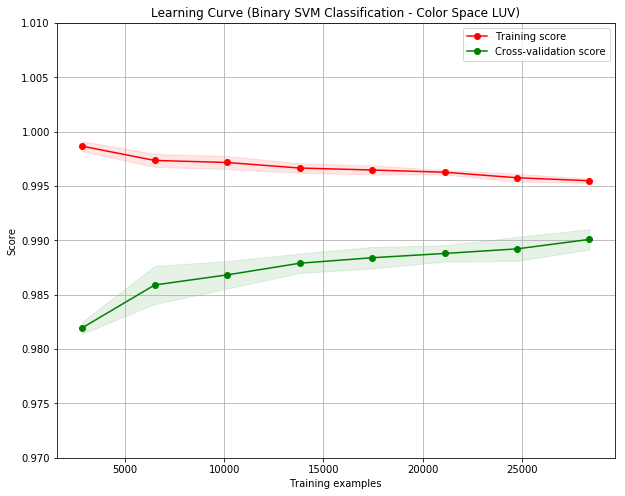

Non Vehicles: 8968  Vehicles Left 909  Middle: 1253  Right: 664  Unknown: 5966
44.0 Seconds to get the curve...
[0.9888232  0.99009009 0.99070946 0.99124437 0.99186374 0.99208896
 0.99211712 0.99262387]


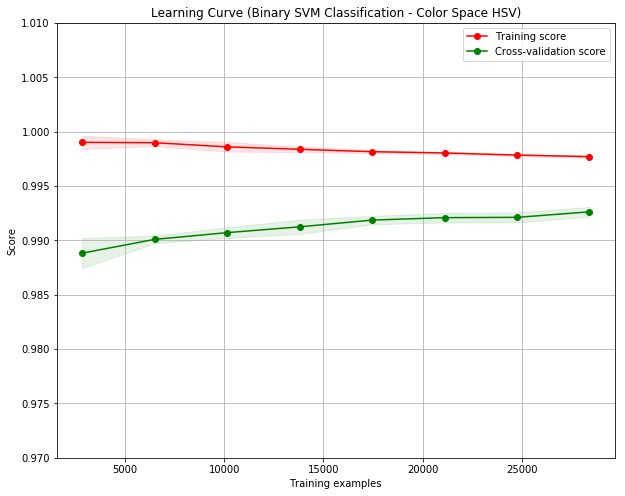

In [7]:
import ObjectDetection as od
importlib.reload(od)
import pickle
from sklearn.svm import SVC

extract_spatial_features=True
extract_color_features = True
extract_hog_features = True
spatial = 16 
histogram_bins = 16


# hog parameters
orient=9
pix_per_cell=16
cell_per_block=3
hog_channel="ALL" # can take values of 0, 1, 2, or "ALL"

images_path = 'test_images/large_set_car_non_car/**/*.png'
#images_path = 'test_images/large_set_left_right_middle_no_car/**/*.png'

C=0.001


def plot_learning_curve(title, train_sizes, train_scores, test_scores, y, ylim=None):
    plt.figure(figsize=(plt_img_width,plt_img_height))
    plt.title('Learning Curve ('+title+')')
    if ylim is not None: plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_scores_mean, train_scores_std = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
    test_scores_mean, test_scores_std = np.mean(test_scores, axis=1), np.std(test_scores, axis=1)
    
    print(test_scores_mean)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()  

color_space = 'LUV'    
train_sizes, train_scores, test_scores, y = od.model_selection_learning_single_svm(
    images_path, color_space, 
    extract_spatial_features, extract_color_features, extract_hog_features, 
    spatial, histogram_bins,
    orient, pix_per_cell, cell_per_block, hog_channel,
    LinearSVC(C=C) )

plot_learning_curve(
    "Binary SVM Classification - Color Space LUV", 
    train_sizes, 
    train_scores, 
    test_scores, 
    y,
    ylim=(0.97, 1.01))

color_space = 'HSV'
train_sizes, train_scores, test_scores, y = od.model_selection_learning_single_svm(
    images_path, color_space, 
    extract_spatial_features, extract_color_features, extract_hog_features, 
    spatial, histogram_bins,
    orient, pix_per_cell, cell_per_block, hog_channel,
    LinearSVC(C=C) )

plot_learning_curve(
    "Binary SVM Classification - Color Space HSV", 
    train_sizes, 
    train_scores, 
    test_scores, 
    y,
    ylim=(0.97, 1.01))


## Sliding Window Scales

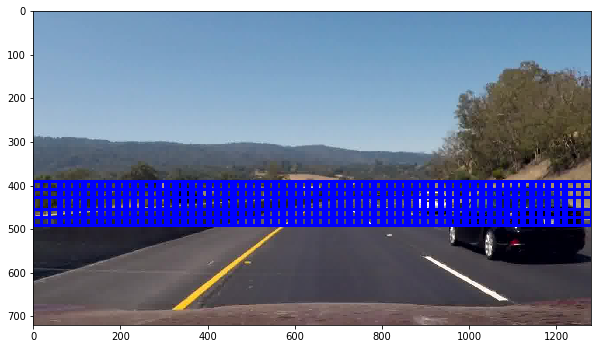

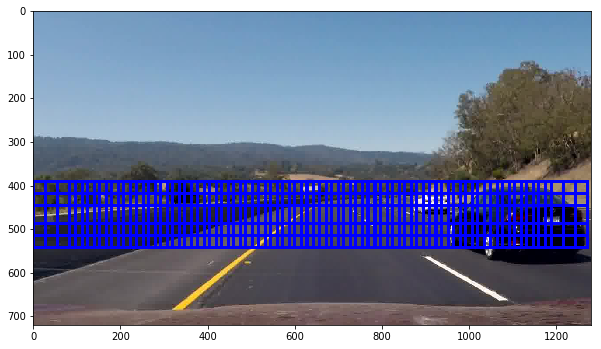

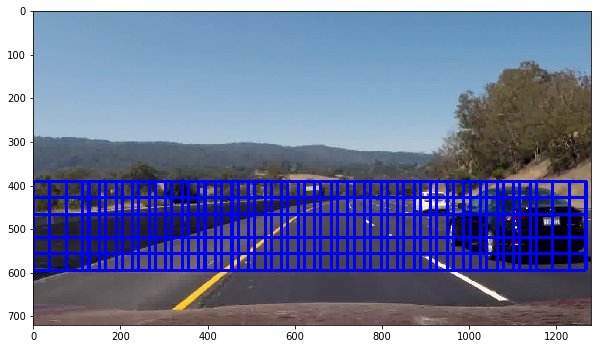

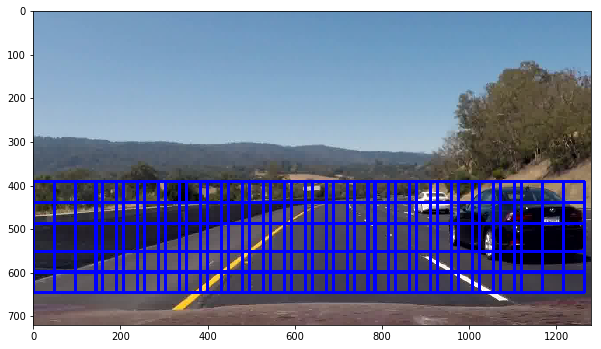

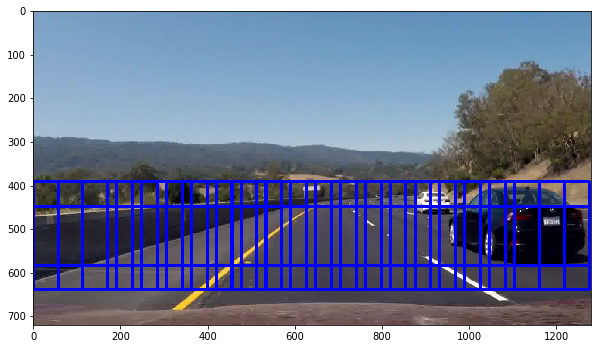

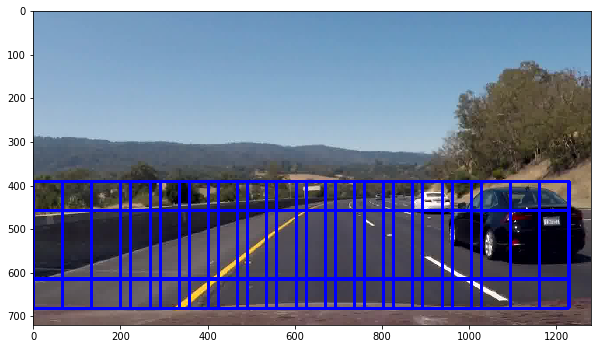

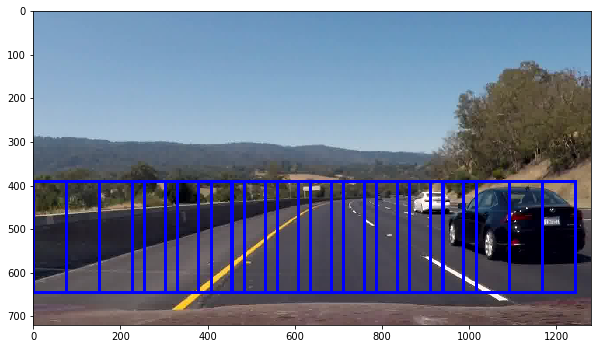

In [87]:
import ObjectDetection as od
importlib.reload(od)


#y_start_stop = [470, 690]
#image = mpimg.imread('test_images/bbox-example-image.jpg')

#image = mpimg.imread('test_images/test_video/image-041.jpg')
image = mpimg.imread('test_images/test_video/image-032.jpg')

scale_min=1.0
scale_max=4.0
detection_window_size=64 
y_start_stop = [390, 690]
ystart = y_start_stop[0]
ymax = y_start_stop[1] #= int(y_start_stop[0] + detection_window_size * scale_max)
steps = 7

for scale in np.linspace(scale_min, scale_max, steps):
    ystop = int(ystart + detection_window_size * scale * 1.6)

    if (ystop > ymax):
        ystop = ymax

    draw_image = np.copy(image)

    # Uncomment the following line if you extracted training
    # data from .png images (scaled 0 to 1 by mpimg) and the
    # image you are searching is a .jpg (scaled 0 to 255)
    draw_image = draw_image.astype(np.float32)/255

    windows = od.slide_window(draw_image, x_start_stop=[None, None], y_start_stop=(ystart, ystop), 
                        xy_window=(int(64*scale), int(64*scale)), xy_overlap=(0.7, 0.7))


    window_img = od.draw_boxes(draw_image, windows, color=(0, 0, 1), thick=6)                    

    plt.figure(figsize=(plt_img_width,plt_img_height))
    plt.imshow(window_img)


## Search and Classify

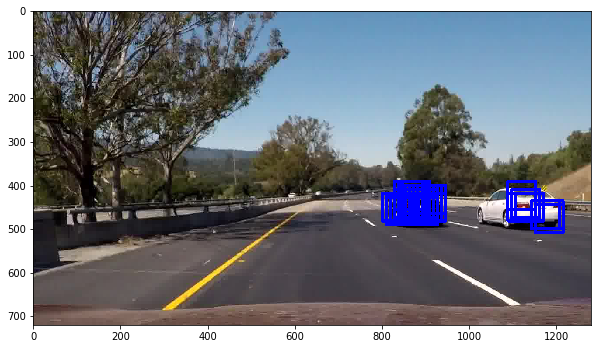

In [42]:
import ObjectDetection as od
importlib.reload(od)
import pickle
from sklearn.svm import LinearSVC

# load a pe-trained svc model from a serialized (pickle) file
#dist_pickle = pickle.load(open("models/car_detection_svc_model.p", "rb"))
dist_pickle = pickle.load(open("models/car_detection_svc_model_large.p", "rb"))

# get attributes of our svc object
svcs = dist_pickle["svc"]
X_scalers = dist_pickle["scaler"]
orient = dist_pickle["orient"]
pix_per_cell = dist_pickle["pix_per_cell"]
cell_per_block = dist_pickle["cell_per_block"]
hog_channel = dist_pickle["hog_channel"]
spatial_size = dist_pickle["spatial_size"]
histogram_bins = dist_pickle["hist_bins"]
color_space = dist_pickle["color_space"]
extract_spatial_features = dist_pickle["extract_spatial_features"]
extract_color_features = dist_pickle["extract_color_features"]
extract_hog_features = dist_pickle["extract_hog_features"] 

#y_start_stop = [470, 690]
#image = mpimg.imread('test_images/bbox-example-image.jpg')

y_start_stop = [390, 690]
image = mpimg.imread('test_images/test_video/image-041.jpg')

draw_image = np.copy(image)

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
image = image.astype(np.float32)/255
'''
windows = od.slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=(96, 96), xy_overlap=(0.5, 0.5))
'''

windows = od.slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=(64, 64), xy_overlap=(0.85, 0.85))

hot_windows = od.search_windows(
    image, windows, svcs, X_scalers, color_space=color_space, 
    spatial_size=(spatial_size,spatial_size), hist_bins=histogram_bins, 
    orient=orient, pix_per_cell=pix_per_cell, 
    cell_per_block=cell_per_block, 
    hog_channel=hog_channel, 
    extract_spatial_features=extract_spatial_features, 
    extract_color_features=extract_color_features, 
    extract_hog_features=extract_hog_features)                       

window_img = od.draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

plt.figure(figsize=(plt_img_width,plt_img_height))
plt.imshow(window_img)


## Hog Sub-Sampling

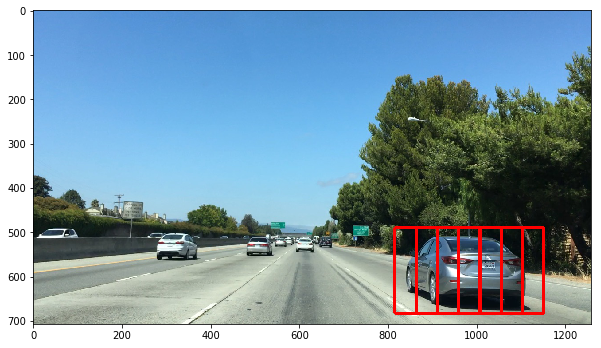

In [3]:
import ObjectDetection as od
importlib.reload(od)

import pickle

# load a pe-trained svc model from a serialized (pickle) file
#dist_pickle = pickle.load(open("models/udacity_pretrained_svc_pickle.p", "rb"))
dist_pickle = pickle.load(open("models/car_detection_svc_model_large.p", "rb"))

# get attributes of our svc object
svcs = dist_pickle["svc"]
X_scalers = dist_pickle["scaler"]
orient = dist_pickle["orient"]
pix_per_cell = dist_pickle["pix_per_cell"]
cell_per_block = dist_pickle["cell_per_block"]
hog_channel = dist_pickle["hog_channel"]
spatial_size = dist_pickle["spatial_size"]
hist_bins = dist_pickle["hist_bins"]
color_space = dist_pickle["color_space"]
extract_spatial_features = dist_pickle["extract_spatial_features"]
extract_color_features = dist_pickle["extract_color_features"]
extract_hog_features = dist_pickle["extract_hog_features"] 


#image = mpimg.imread('test_images/test_image.jpg')
image = mpimg.imread('test_images/bbox-example-image.jpg')

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
image = image.astype(np.float32) / 255

ystart = 490
#ystop = 560
ystop = 700
scale = 3.0

detection_boxes, out_image = od.find_cars_in_sub_window(
    image=image, 
    ystart=ystart, ystop=ystop, 
    scale=scale, 
    svcs=svcs, X_scalers=X_scalers, 
    orient=orient, 
    pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
    hog_channel=hog_channel,
    spatial_size=spatial_size, hist_bins=hist_bins,
    color_space=color_space, 
    extract_spatial_features=extract_spatial_features, 
    extract_color_features=extract_color_features, 
    extract_hog_features=extract_hog_features,
    draw=True
)

plt.figure(figsize=(plt_img_width,plt_img_height))
plt.imshow(out_image)


## Rectangle Calculation

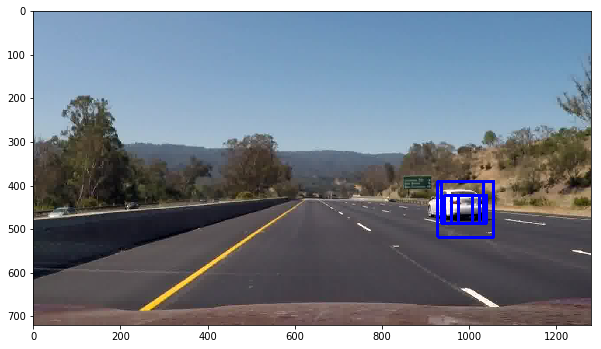

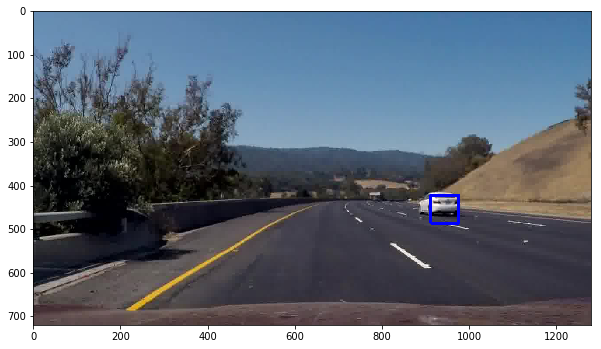

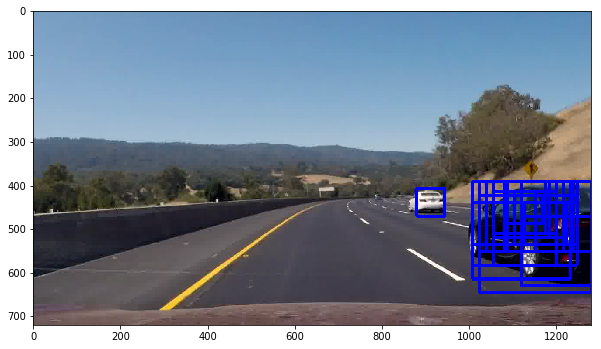

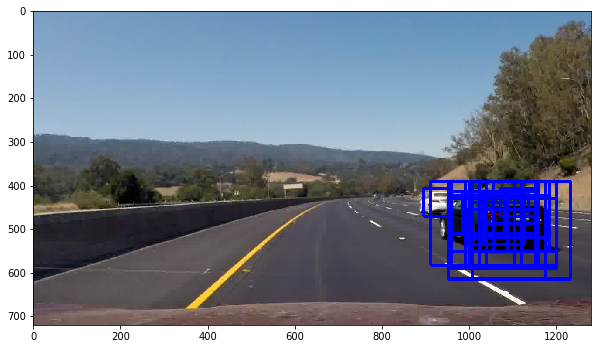

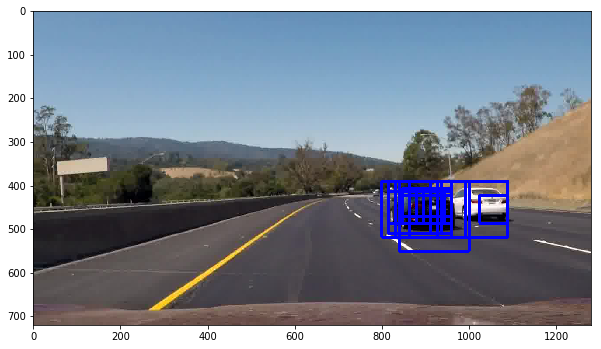

In [91]:
import ObjectDetection as od
importlib.reload(od)

import pickle

# load a pe-trained svc model from a serialized (pickle) file
#dist_pickle = pickle.load(open("models/udacity_pretrained_svc_pickle.p", "rb"))
dist_pickle = pickle.load(open("models/car_detection_svc_model_large.p", "rb"))

# get attributes of our svc object
svcs = dist_pickle["svc"]
X_scalers = dist_pickle["scaler"]
orient = dist_pickle["orient"]
pix_per_cell = dist_pickle["pix_per_cell"]
cell_per_block = dist_pickle["cell_per_block"]
hog_channel = dist_pickle["hog_channel"]
spatial_size = dist_pickle["spatial_size"]
hist_bins = dist_pickle["hist_bins"]
color_space = dist_pickle["color_space"]
extract_spatial_features = dist_pickle["extract_spatial_features"]
extract_color_features = dist_pickle["extract_color_features"]
extract_hog_features = dist_pickle["extract_hog_features"] 


#image = mpimg.imread('test_images/test_image.jpg')

#image = mpimg.imread('test_images/bbox-example-image.jpg')
#ystart = 490

#image = mpimg.imread('test_images/test_video/image-033.jpg')
#image = mpimg.imread('test_images/test_video/image-020.jpg')
#image = mpimg.imread('test_images/test_video/image-032.jpg')
#image = mpimg.imread('test_images/test_video/image-031.jpg')
#image = mpimg.imread('test_images/test_video/image-033.jpg')


# 490

test_image_filenames = [
    'test_images/test_video/image-020.jpg',
    'test_images/test_video/image-027.jpg',
    'test_images/test_video/image-031.jpg',
    'test_images/test_video/image-033.jpg',
    'test_images/test_video/image-038.jpg'
]

for test_image_filename in test_image_filenames:
    ystart = 390
    
    image = mpimg.imread(test_image_filename)
    
    # Uncomment the following line if you extracted training
    # data from .png images (scaled 0 to 1 by mpimg) and the
    # image you are searching is a .jpg (scaled 0 to 255)
    image = image.astype(np.float32) / 255.0

    all_detection_boxes = od.find_cars(
        image=image,
        ystart=ystart, detection_window_size=64, 
        scale_min=1.0, scale_max=4.0, steps = 7, 
        svcs=svcs, X_scalers=X_scalers, 
        orient=orient, 
        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
        hog_channel=hog_channel,
        spatial_size=spatial_size, hist_bins=hist_bins,
        color_space=color_space, 
        extract_spatial_features=extract_spatial_features, 
        extract_color_features=extract_color_features, 
        extract_hog_features=extract_hog_features)

    detections_image = od.draw_boxes(image, all_detection_boxes, color=(0, 0, 1))
    plt.figure(figsize=(plt_img_width,plt_img_height))
    plt.imshow(detections_image)


## Heat Map

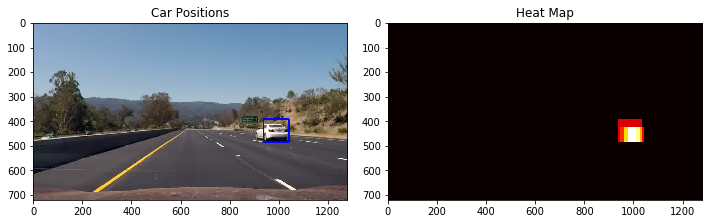

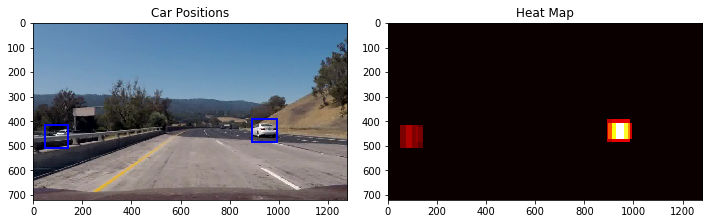

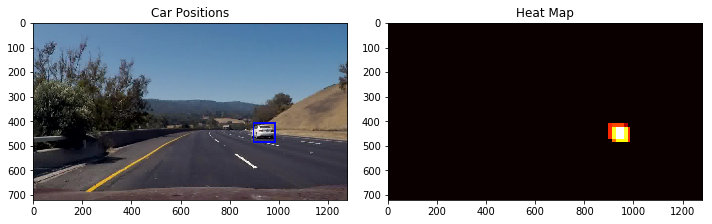

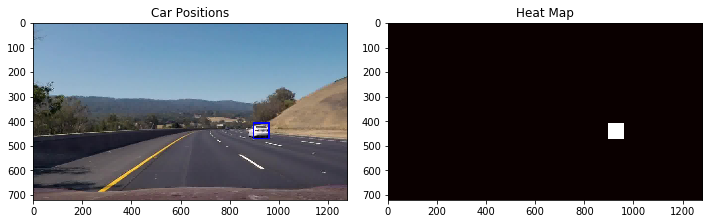

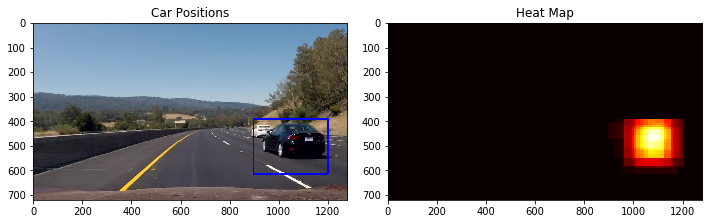

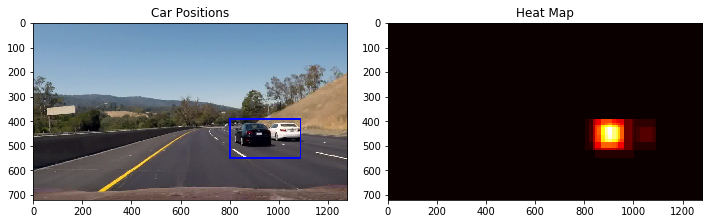

In [89]:
import ObjectDetection as od
importlib.reload(od)
#from scipy.ndimage.measurements import label
#from scipy.ndimage.measurements import 

from scipy.ndimage.measurements import label

import pickle

# load a pe-trained svc model from a serialized (pickle) file
#dist_pickle = pickle.load(open("models/udacity_pretrained_svc_pickle.p", "rb"))
dist_pickle = pickle.load(open("models/car_detection_svc_model_large.p", "rb"))

# get attributes of our svc object
svcs = dist_pickle["svc"]
X_scalers = dist_pickle["scaler"]
orient = dist_pickle["orient"]
pix_per_cell = dist_pickle["pix_per_cell"]
cell_per_block = dist_pickle["cell_per_block"]
hog_channel = dist_pickle["hog_channel"]
spatial_size = dist_pickle["spatial_size"]
hist_bins = dist_pickle["hist_bins"]
color_space = dist_pickle["color_space"]
extract_spatial_features = dist_pickle["extract_spatial_features"]
extract_color_features = dist_pickle["extract_color_features"]
extract_hog_features = dist_pickle["extract_hog_features"] 


#image = mpimg.imread('test_images/test_image.jpg')
#image = mpimg.imread('test_images/bbox-example-image.jpg')
#ystart = 490

test_image_filenames = [
    'test_images/test_video/image-020.jpg',
    'test_images/test_video/image-026.jpg',
    'test_images/test_video/image-027.jpg',
    'test_images/test_video/image-028.jpg',
    'test_images/test_video/image-033.jpg',
    'test_images/test_video/image-038.jpg'
]

for test_image_filename in test_image_filenames:
    ystart = 390
    
    image = mpimg.imread(test_image_filename)

    # Uncomment the following line if you extracted training
    # data from .png images (scaled 0 to 1 by mpimg) and the
    # image you are searching is a .jpg (scaled 0 to 255)
    image = image.astype(np.float32) / 255
    heat_map = np.zeros_like(image[:,:,0]).astype(np.float)

    all_detection_boxes = od.find_cars(
        image=image,
        ystart=ystart, detection_window_size=64, 
        scale_min=1.0, scale_max=4.0, steps = 7, 
        svcs=svcs, X_scalers=X_scalers, 
        orient=orient, 
        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
        hog_channel=hog_channel,
        spatial_size=spatial_size, hist_bins=hist_bins,
        color_space=color_space, 
        extract_spatial_features=extract_spatial_features, 
        extract_color_features=extract_color_features, 
        extract_hog_features=extract_hog_features)

    # Add heat to each box in box list
    heat_map = od.add_heat(heat_map,all_detection_boxes)

    # Apply threshold to help remove false positives
    heat_map = od.apply_threshold(heat_map, 0.6)

    # Visualize the heatmap when displaying    
    heat_map_clipped = np.clip(heat_map, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heat_map_clipped)

    boxes = od.get_boxes_from_labels(labels)

    '''
    filtered_labels = [] 

    for region in regionprops(labels):
        region.
    '''

    draw_img = od.draw_labeled_bboxes(np.copy(image), boxes)

    fig = plt.figure(figsize=(plt_img_width,plt_img_height))
    plt.subplot(121)
    plt.imshow(draw_img)
    plt.title('Car Positions')
    plt.subplot(122)
    plt.imshow(heat_map_clipped, cmap='hot')
    plt.title('Heat Map')
    fig.tight_layout()





## Object Tracking

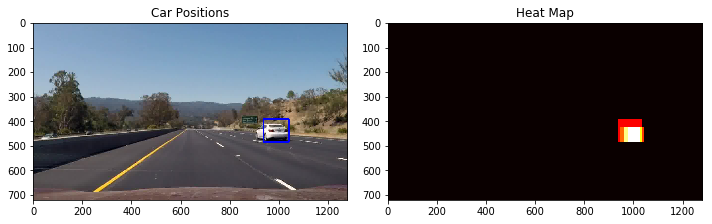

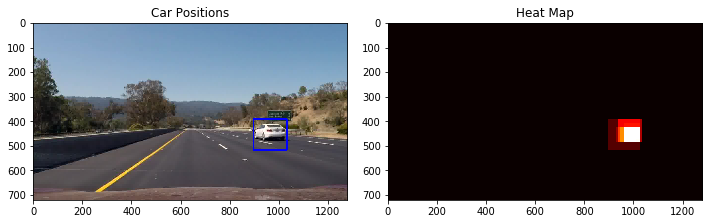

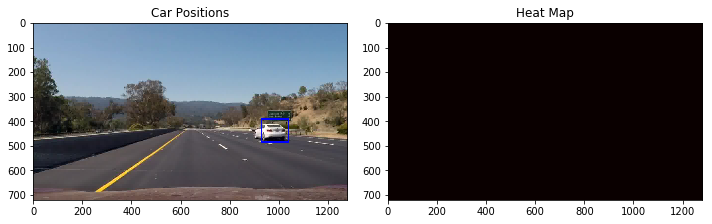

In [107]:
import ObjectDetection as od
importlib.reload(od)
import object_tracking as ot
importlib.reload(ot)


from scipy.ndimage.measurements import label
import pickle

# load a pe-trained svc model from a serialized (pickle) file
#dist_pickle = pickle.load(open("models/udacity_pretrained_svc_pickle.p", "rb"))
dist_pickle = pickle.load(open("models/car_detection_svc_model_large.p", "rb"))

# get attributes of our svc object
svcs = dist_pickle["svc"]
X_scalers = dist_pickle["scaler"]
orient = dist_pickle["orient"]
pix_per_cell = dist_pickle["pix_per_cell"]
cell_per_block = dist_pickle["cell_per_block"]
hog_channel = dist_pickle["hog_channel"]
spatial_size = dist_pickle["spatial_size"]
hist_bins = dist_pickle["hist_bins"]
color_space = dist_pickle["color_space"]
extract_spatial_features = dist_pickle["extract_spatial_features"]
extract_color_features = dist_pickle["extract_color_features"]
extract_hog_features = dist_pickle["extract_hog_features"] 


#image = mpimg.imread('test_images/test_image.jpg')

image1 = mpimg.imread('test_images/test_video/image-020.jpg')
image2 = mpimg.imread('test_images/test_video/image-021.jpg')

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
image1 = image1.astype(np.float32) / 255
image2 = image2.astype(np.float32) / 255

heat_map = np.zeros_like(image1[:,:,0]).astype(np.float)

all_detection_boxes = od.find_cars(
    image=image1,
    ystart=390, detection_window_size=64, 
    scale_min=1.0, scale_max=4, steps = 7, 
    svcs=svcs, X_scalers=X_scalers, 
    orient=orient, 
    pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
    hog_channel=hog_channel,
    spatial_size=spatial_size, hist_bins=hist_bins,
    color_space=color_space, 
    extract_spatial_features=extract_spatial_features, 
    extract_color_features=extract_color_features, 
    extract_hog_features=extract_hog_features)

# Add heat to each box in box list
heat_map = od.add_heat(heat_map,all_detection_boxes)

# Apply threshold to help remove false positives
heat_map = od.apply_threshold(heat_map, 0.2)

# Visualize the heatmap when displaying    
heat_map_clipped = np.clip(heat_map, 0, 3.0)

# Find final boxes from heatmap using label function
labels = label(heat_map_clipped)

boxes = od.get_boxes_from_labels(labels)
draw_img = od.draw_labeled_bboxes(np.copy(image1), boxes)

# track object
object_tracking = ot.ObjectTracking()
boxes =  object_tracking.track(boxes, heat_map_clipped, min_age = 0)

fig = plt.figure(figsize=(plt_img_width,plt_img_height))

plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heat_map_clipped, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()


# 
# second image
#

heat_map = np.zeros_like(image2[:,:,0]).astype(np.float)



all_detection_boxes = od.find_cars(
    image=image2,
    ystart=390, detection_window_size=64, 
    scale_min=1, scale_max=4, steps = 7, 
    svcs=svcs, X_scalers=X_scalers, 
    orient=orient, 
    pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
    hog_channel=hog_channel,
    spatial_size=spatial_size, hist_bins=hist_bins,
    color_space=color_space, 
    extract_spatial_features=extract_spatial_features, 
    extract_color_features=extract_color_features, 
    extract_hog_features=extract_hog_features)

# Add heat to each box in box list
heat_map = od.add_heat(heat_map,all_detection_boxes)

# Apply threshold to help remove false positives
heat_map = od.apply_threshold(heat_map, 0.2)

# Visualize the heatmap when displaying    
heat_map_clipped = np.clip(heat_map, 0, 3.0)

# Find final boxes from heatmap using label function
labels = label(heat_map_clipped)

boxes = od.get_boxes_from_labels(labels)
draw_img = od.draw_labeled_bboxes(np.copy(image2), boxes)

fig = plt.figure(figsize=(plt_img_width,plt_img_height))
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heat_map_clipped, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()

# track object
boxes =  object_tracking.track(boxes, heat_map_clipped, min_age = 0)
draw_img = od.draw_labeled_bboxes(np.copy(image2), boxes)


fig = plt.figure(figsize=(plt_img_width,plt_img_height))
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(object_tracking.heat_map, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()
